In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import requests
import json
import datetime
import time
import os
import seaborn as sns

In [2]:
def get_data(ticker, start="2014-07-01", end="2024-07-02"):
    data = yf.Ticker(ticker)
    return data.history(start=start, end=end)

def min_max_scaler(data):
    return (data - data.min()) / (data.max() - data.min())

In [3]:
TICKS = ['AAL']
TICKS_NAMES = ['American Airlines']

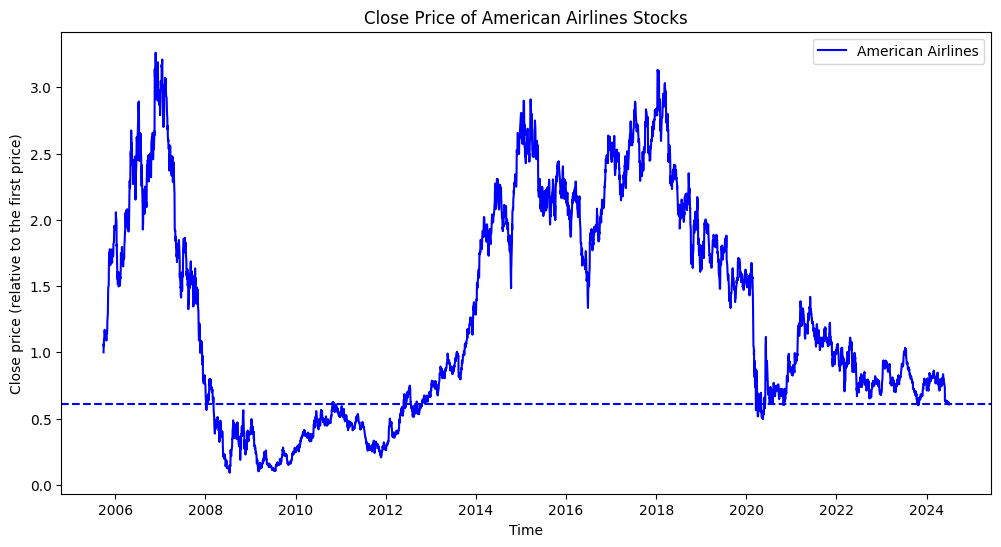

In [4]:
warnings.filterwarnings("ignore")
colors = ['blue', 'orange', 'green', 'red', 'purple']


def plot_data(TICKS, TICKS_NAMES, colors, title, start="1990-07-01", end="2024-07-02"):
    plt.figure(figsize=(12, 6))
    for ticker, color, ticker_name in zip(TICKS, colors, TICKS_NAMES):
        data = get_data(ticker, start, end)
        base_price = data['Close'][0]
        close_price = data['Close'] / base_price
        plt.plot(close_price, label=ticker_name, color=color)
        # plot horizonal dotted line from the last point, in the corresposind color
        plt.axhline(y=close_price[-1], color=color, linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Close price (relative to the first price)')
    plt.title(title)
    plt.legend()
    plt.show()

plot_data(TICKS, TICKS_NAMES, colors, title='Close Price of American Airlines Stocks')

In [5]:
df_AAL = get_data('AAL')
df_AAL = df_AAL['Close'] / df_AAL['Close'][0]
df_AAL = pd.DataFrame(df_AAL)

## Crude Oil Prices

In [6]:
df_crude_oil = pd.read_csv('data_final/BrentOilPrices.csv')
df_crude_oil['Date'] = pd.to_datetime(df_crude_oil['Date'])

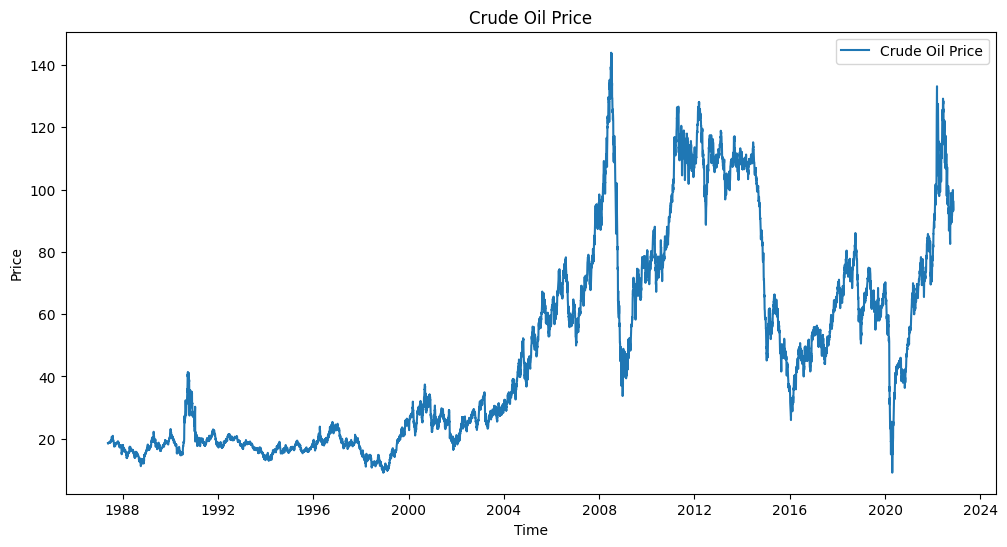

In [7]:
# plot crude oil prices
plt.figure(figsize=(12, 6))
plt.plot(df_crude_oil['Date'], df_crude_oil['Price'], label='Crude Oil Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Crude Oil Price')
plt.legend()
plt.show()

In [8]:
df_crude_oil

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


## Jet Fuel Prices

In [9]:
jet_fuel = pd.read_csv('data_final/JetFuel.csv')
jet_fuel['Day'] = pd.to_datetime(jet_fuel['Day'])
jet_fuel.columns = ['Date', 'Price']

In [10]:
for i in range(60):
    shifted_jet_fuel = jet_fuel.copy()
    # shift the jet fuel dates back by i days
    shifted_jet_fuel['Date'] = shifted_jet_fuel['Date'] - pd.DateOffset(days=i)
    # merge the shifted jet fuel prices with the crude oil prices
    merged = pd.merge(df_crude_oil, shifted_jet_fuel, on='Date', how='inner')
    # calculate the correlation between the two prices
    corr = merged['Price_x'].corr(merged['Price_y'])
    print(f'correlation between crude oil and jet fuel prices shifted by {i} days: {corr}')

correlation between crude oil and jet fuel prices shifted by 0 days: 0.9853417176412943
correlation between crude oil and jet fuel prices shifted by 1 days: 0.9844973207352671
correlation between crude oil and jet fuel prices shifted by 2 days: 0.9836272546410086
correlation between crude oil and jet fuel prices shifted by 3 days: 0.9836908059817611
correlation between crude oil and jet fuel prices shifted by 4 days: 0.9844466957481153
correlation between crude oil and jet fuel prices shifted by 5 days: 0.984475681401618
correlation between crude oil and jet fuel prices shifted by 6 days: 0.9836882012439694
correlation between crude oil and jet fuel prices shifted by 7 days: 0.9830667396926933
correlation between crude oil and jet fuel prices shifted by 8 days: 0.9824763813279762
correlation between crude oil and jet fuel prices shifted by 9 days: 0.9818231488855536
correlation between crude oil and jet fuel prices shifted by 10 days: 0.9824468743170311
correlation between crude oil an

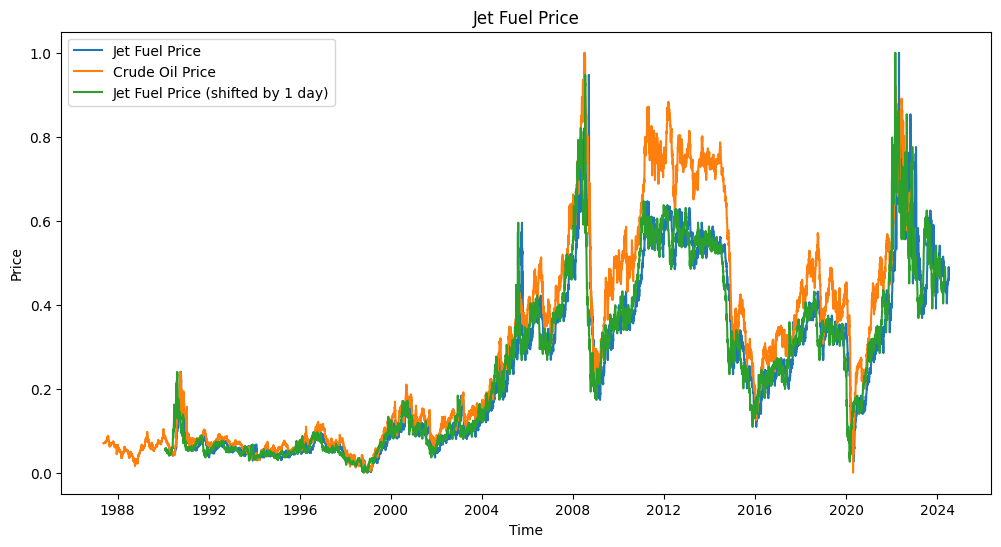

In [11]:
# plot jet fuel prices
plt.figure(figsize=(12, 6))
plt.plot(jet_fuel['Date'], min_max_scaler(jet_fuel['Price']), label='Jet Fuel Price')
plt.plot(df_crude_oil['Date'], min_max_scaler(df_crude_oil['Price']), label='Crude Oil Price')
plt.plot(shifted_jet_fuel['Date'], min_max_scaler(shifted_jet_fuel['Price']), label='Jet Fuel Price (shifted by 1 day)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Jet Fuel Price')
plt.legend()
plt.show()

In [12]:
def calc_correlation(data1, data2):
    return data1.corr(data2)

correlation = calc_correlation(df_crude_oil['Price'], jet_fuel['Price'])
correlation

-0.6698116375196307

## Quarterly Revenue and Net Income

In [13]:
revenue_quarterly = pd.read_csv('data_final/american_airlines_quarterly_revenue.csv')
revenue_quarterly['Date'] = pd.to_datetime(revenue_quarterly['Date'])

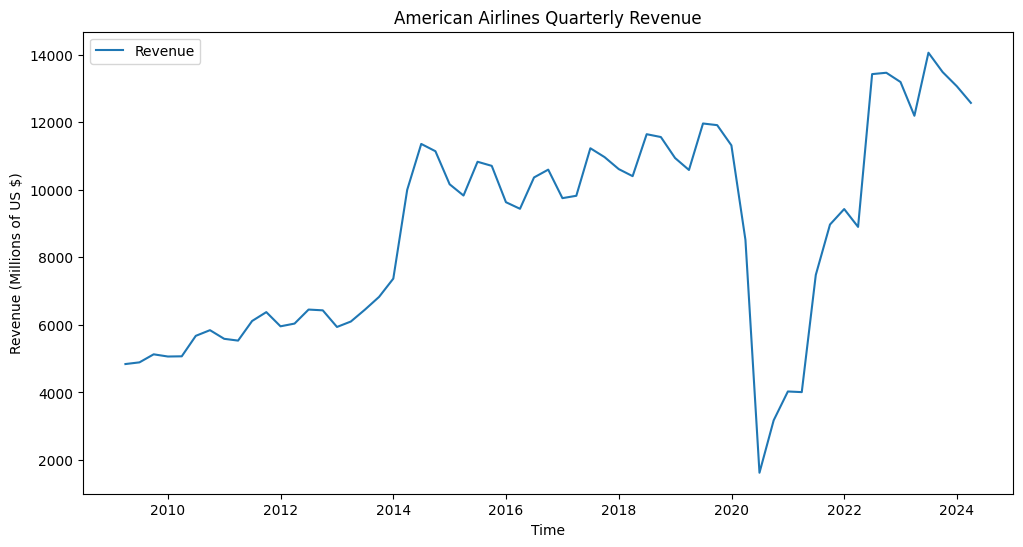

In [14]:
# plot quarterly revenue
plt.figure(figsize=(12, 6))
plt.plot(revenue_quarterly['Date'], revenue_quarterly['Revenue (Millions of US $)'], label='Revenue')
plt.xlabel('Time')
plt.ylabel('Revenue (Millions of US $)')
plt.title('American Airlines Quarterly Revenue')
plt.legend()
plt.show()

In [15]:
net_income_quarterly = pd.read_csv('data_final/american_airlines_quarterly_net_income.csv')
net_income_quarterly['Date'] = pd.to_datetime(net_income_quarterly['Date'])

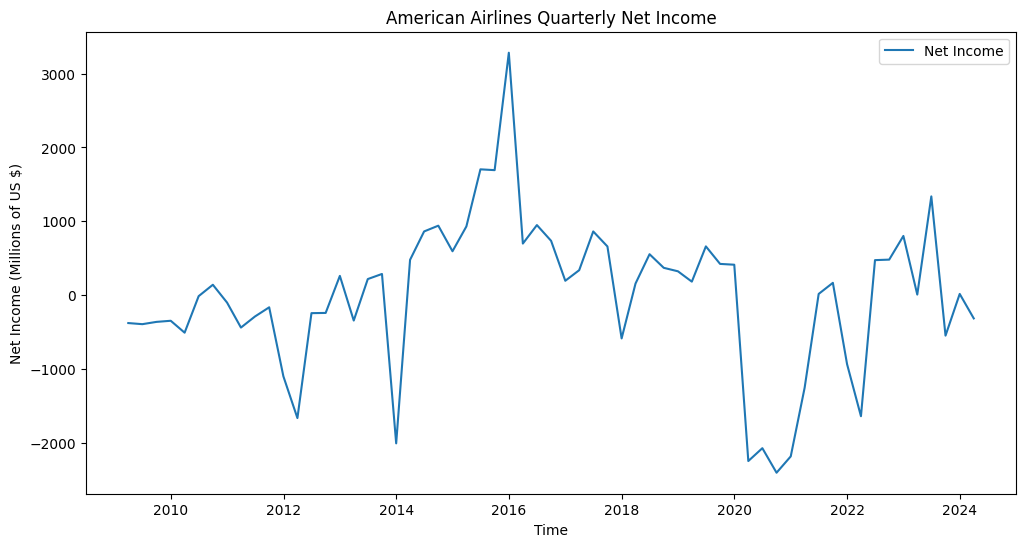

In [16]:
# plot quarterly net income
plt.figure(figsize=(12, 6))
plt.plot(net_income_quarterly['Date'], net_income_quarterly['Net Income (Millions of US $)'], label='Net Income')
plt.xlabel('Time')
plt.ylabel('Net Income (Millions of US $)')
plt.title('American Airlines Quarterly Net Income')
plt.legend()
plt.show()

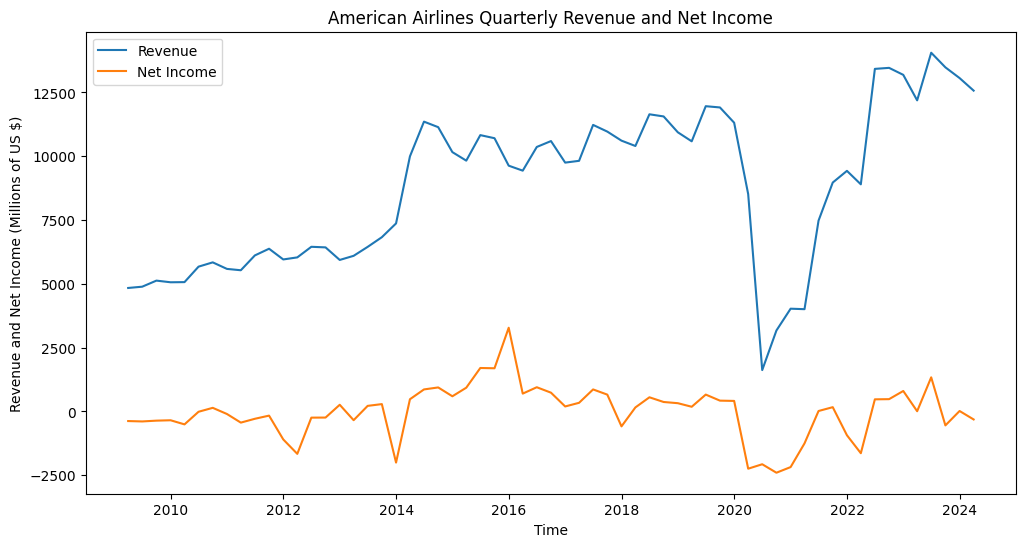

In [17]:
# plot both quarterly revenue and net income
plt.figure(figsize=(12, 6))
plt.plot(revenue_quarterly['Date'], revenue_quarterly['Revenue (Millions of US $)'], label='Revenue')
plt.plot(net_income_quarterly['Date'], net_income_quarterly['Net Income (Millions of US $)'], label='Net Income')
plt.xlabel('Time')
plt.ylabel('Revenue and Net Income (Millions of US $)')
plt.title('American Airlines Quarterly Revenue and Net Income')
plt.legend()
plt.show()

## S&P 500 Index

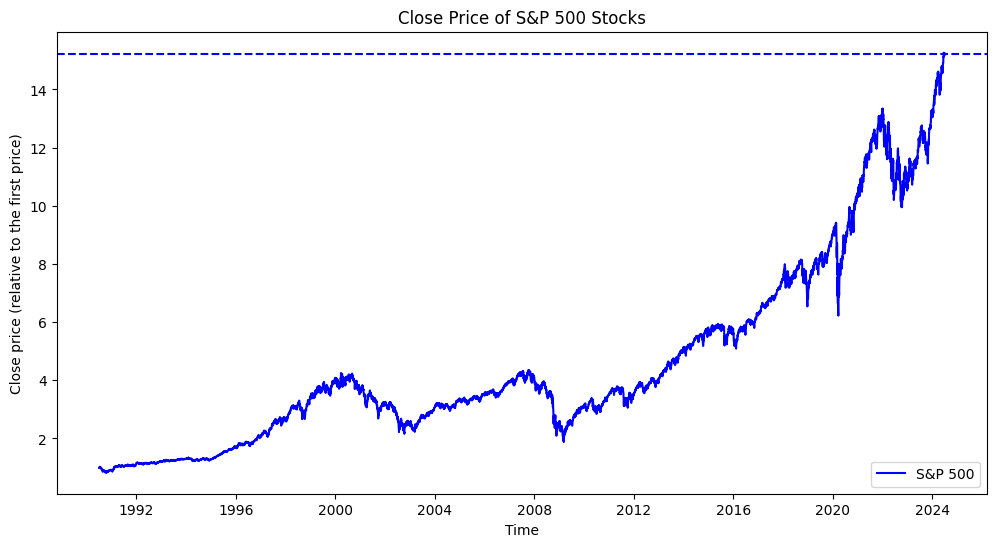

In [18]:
TICKS = ['^GSPC']
TICKS_NAMES = ['S&P 500']

plot_data(TICKS, TICKS_NAMES, colors, title='Close Price of S&P 500 Stocks')

In [19]:
df_sp500 = get_data('^GSPC')
df_sp500 = df_sp500['Close'] / df_sp500['Close'][0]
df_sp500 = pd.DataFrame(df_sp500)

## XAL Index

In [20]:
df_xal = pd.read_csv("data_final/xal.csv")
df_xal['Close/Last'] = df_xal['Close/Last'] / df_xal['Close/Last'][0]
df_xal['Date'] = pd.to_datetime(df_xal['Date'])
df_xal = df_xal[['Date', 'Close/Last']]

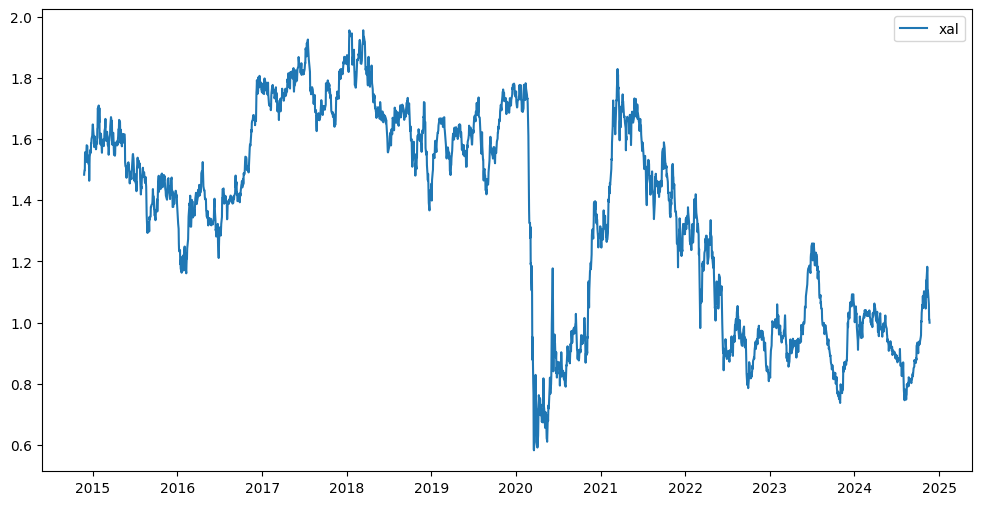

In [21]:
# plot quarterly net income
plt.figure(figsize=(12, 6))
plt.plot(df_xal['Date'], df_xal['Close/Last'], label='xal')
plt.legend()
plt.show()

## Combine All Columns into One Dataset

In [22]:
df_AAL.reset_index(inplace=True)
df_sp500.reset_index(inplace=True)

In [23]:
# Date is like this "2014-07-01 00:00:00-04:00", i want it like this "2014-07-01 00:00:00"
df_AAL['Date'] = pd.to_datetime(df_AAL['Date'])
df_AAL['Date'] = df_AAL['Date'].dt.strftime('%Y-%m-%d')
df_AAL['Date'] = pd.to_datetime(df_AAL['Date'])

df_sp500['Date'] = df_sp500['Date'].dt.strftime('%Y-%m-%d')
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

df_xal['Date'] = df_xal['Date'].dt.strftime('%Y-%m-%d')
df_xal['Date'] = pd.to_datetime(df_xal['Date'])

### Find Intersection of Dates between columns

In [24]:
# get date range for each dataframe
print(f'Close Price: ({df_AAL["Date"].min()}, {df_AAL["Date"].max()})')
print(f'Crude Oil Price: ({df_crude_oil["Date"].min()}, {df_crude_oil["Date"].max()})')
print(f'Jet Fuel Price: ({jet_fuel["Date"].min()}, {jet_fuel["Date"].max()})')
print(f'S&P 500: ({df_sp500["Date"].min()}, {df_sp500["Date"].max()})')
print(f'XAL: ({df_xal["Date"].min()}, {df_xal["Date"].max()})')


print(f'Revenue Quarterly: ({revenue_quarterly["Date"].min()}, {revenue_quarterly["Date"].max()})')
# Interpolate the quarterly data to daily data
date_range = pd.date_range(start=revenue_quarterly["Date"].min(), end=revenue_quarterly["Date"].max(), freq='D')
df_dates = pd.DataFrame(date_range, columns=['Date'])
revenue_quarterly = df_dates.merge(revenue_quarterly, on='Date', how='left')
revenue_quarterly['Revenue (Millions of US $)'] = revenue_quarterly['Revenue (Millions of US $)'].interpolate()

print(f'Net Income Quarterly: ({net_income_quarterly["Date"].min()}, {net_income_quarterly["Date"].max()})')
# Interpolate the quarterly data to daily data
date_range = pd.date_range(start=net_income_quarterly["Date"].min(), end=net_income_quarterly["Date"].max(), freq='D')
df_dates = pd.DataFrame(date_range, columns=['Date'])
net_income_quarterly = df_dates.merge(net_income_quarterly, on='Date', how='left')
net_income_quarterly['Net Income (Millions of US $)'] = net_income_quarterly['Net Income (Millions of US $)'].interpolate()

# get intersection of date ranges
start_date = max(df_AAL["Date"].min(), df_crude_oil["Date"].min(), jet_fuel["Date"].min(), revenue_quarterly["Date"].min(), net_income_quarterly["Date"].min(), df_sp500["Date"].min(), df_xal["Date"].min())
end_date = min(df_AAL["Date"].max(), df_crude_oil["Date"].max(), jet_fuel["Date"].max(), revenue_quarterly["Date"].max(), net_income_quarterly["Date"].max(), df_sp500["Date"].max(), df_xal["Date"].max())
print(f'Intersection of date ranges: ({start_date}, {end_date})')

Close Price: (2014-07-01 00:00:00, 2024-07-01 00:00:00)
Crude Oil Price: (1987-05-20 00:00:00, 2022-11-14 00:00:00)
Jet Fuel Price: (1990-04-02 00:00:00, 2024-07-08 00:00:00)
S&P 500: (2014-07-01 00:00:00, 2024-07-01 00:00:00)
XAL: (2014-11-24 00:00:00, 2024-11-21 00:00:00)
Revenue Quarterly: (2009-03-31 00:00:00, 2024-03-31 00:00:00)
Net Income Quarterly: (2009-03-31 00:00:00, 2024-03-31 00:00:00)
Intersection of date ranges: (2014-11-24 00:00:00, 2022-11-14 00:00:00)


In [25]:
df_crude_oil.columns = ['Date', 'Crude Oil Price']
jet_fuel.columns = ['Date', 'Jet Fuel Price']
revenue_quarterly.columns = ['Date', 'Revenue']
net_income_quarterly.columns = ['Date', 'Net Income']
df_sp500.columns = ['Date', 'S&P 500']
df_xal.columns = ['Date', 'XAL']

### Merge According to AAL Dates

In [26]:
# Create a complete date range dataframe
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_dates = pd.DataFrame(date_range, columns=['Date'])

df_AAL = df_AAL[(df_AAL['Date'] >= start_date) & (df_AAL['Date'] <= end_date)]
df_crude_oil = df_crude_oil[(df_crude_oil['Date'] >= start_date) & (df_crude_oil['Date'] <= end_date)]
df_jet_fuel = jet_fuel[(jet_fuel['Date'] >= start_date) & (jet_fuel['Date'] <= end_date)]
df_revenue_quarterly = revenue_quarterly[(revenue_quarterly['Date'] >= start_date) & (revenue_quarterly['Date'] <= end_date)]
df_net_income_quarterly = net_income_quarterly[(net_income_quarterly['Date'] >= start_date) & (net_income_quarterly['Date'] <= end_date)]
df_sp500 = df_sp500[(df_sp500['Date'] >= start_date) & (df_sp500['Date'] <= end_date)]
df_xal = df_xal[(df_xal['Date'] >= start_date) & (df_xal['Date'] <= end_date)]


# Merge all dataframes with the date range dataframe
combined_df = df_dates.merge(df_AAL, on='Date', how='left') \
                      .merge(df_crude_oil, on='Date', how='left') \
                      .merge(df_jet_fuel, on='Date', how='left') \
                      .merge(df_revenue_quarterly, on='Date', how='left') \
                      .merge(df_net_income_quarterly, on='Date', how='left') \
                      .merge(df_sp500, on='Date', how='left') \
                        .merge(df_xal, on='Date', how='left')

### Plot Missing Values

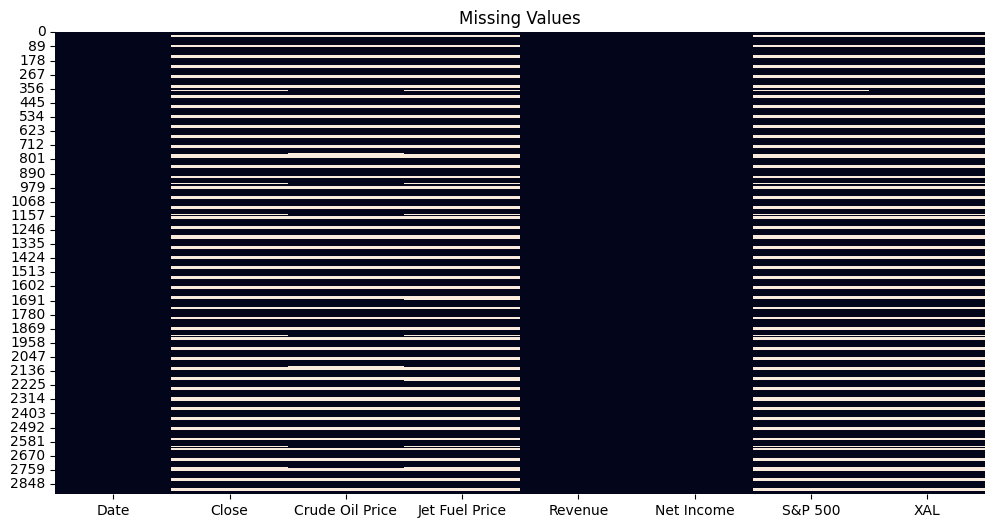

In [27]:
# plot missing values for each column
plt.figure(figsize=(12, 6))
sns.heatmap(combined_df.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

In [28]:
# count nones 
print(f'close price: {combined_df["Close"].isnull().sum()} / {len(combined_df)} = {combined_df["Close"].isnull().sum() / len(combined_df)}')
print(f'crude oil price: {combined_df["Crude Oil Price"].isnull().sum()} / {len(combined_df)} = {combined_df["Crude Oil Price"].isnull().sum() / len(combined_df)}')
print(f'jet fuel price: {combined_df["Jet Fuel Price"].isnull().sum()} / {len(combined_df)} = {combined_df["Jet Fuel Price"].isnull().sum() / len(combined_df)}')
print(f'revenue: {combined_df["Revenue"].isnull().sum()} / {len(combined_df)} = {combined_df["Revenue"].isnull().sum() / len(combined_df)}')
print(f'net income: {combined_df["Net Income"].isnull().sum()} / {len(combined_df)} = {combined_df["Net Income"].isnull().sum() / len(combined_df)}')
print(f's&p 500: {combined_df["S&P 500"].isnull().sum()} / {len(combined_df)} = {combined_df["S&P 500"].isnull().sum() / len(combined_df)}')
print(f'XAL: {combined_df["XAL"].isnull().sum()} / {len(combined_df)} = {combined_df["XAL"].isnull().sum() / len(combined_df)}')

close price: 905 / 2913 = 0.31067627875042914
crude oil price: 882 / 2913 = 0.3027806385169928
jet fuel price: 915 / 2913 = 0.3141091658084449
revenue: 0 / 2913 = 0.0
net income: 0 / 2913 = 0.0
s&p 500: 905 / 2913 = 0.31067627875042914
XAL: 894 / 2913 = 0.30690010298661174


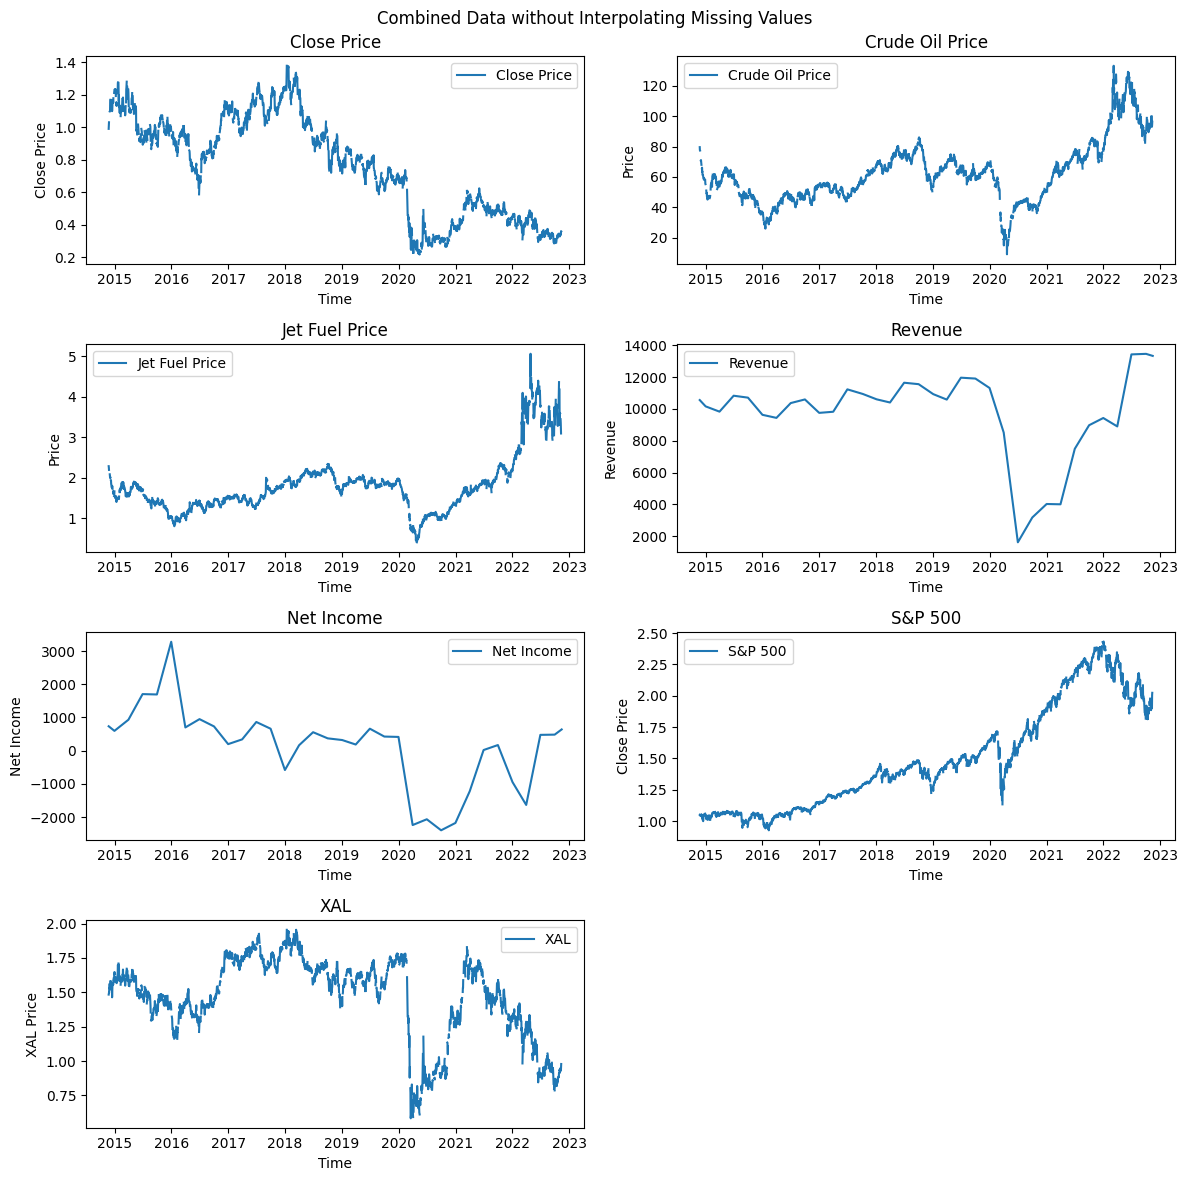

In [31]:
def plot_combined(combined_df, sup_title):
    # Define the features to plot
    features = [
        ('Close', 'Close Price', 'Close Price'),
        ('Crude Oil Price', 'Crude Oil Price', 'Price'),
        ('Jet Fuel Price', 'Jet Fuel Price', 'Price'),
        ('Revenue', 'Revenue', 'Revenue'),
        ('Net Income', 'Net Income', 'Net Income'),
        ('S&P 500', 'S&P 500', 'Close Price'),
        ('XAL', 'XAL', 'XAL Price')  # New feature
    ]

    # Set up the figure size and layout
    plt.figure(figsize=(12, 12))  # Adjusted for 7 subplots

    # Plot each feature in a loop
    for i, (col, title, ylabel) in enumerate(features, start=1):
        plt.subplot(4, 2, i)  # Adjust for 4x2 layout to accommodate 7 subplots
        plt.plot(combined_df['Date'], combined_df[col], label=title)
        plt.title(title)
        plt.xlabel('Time')
        plt.ylabel(ylabel)
        plt.legend()

    plt.suptitle(sup_title)  # Add a title to the overall plot
    plt.tight_layout()  # Ensure no overlap
    plt.show()

plot_combined(combined_df, 'Combined Data without Interpolating Missing Values')

### Interpolate Missing Values

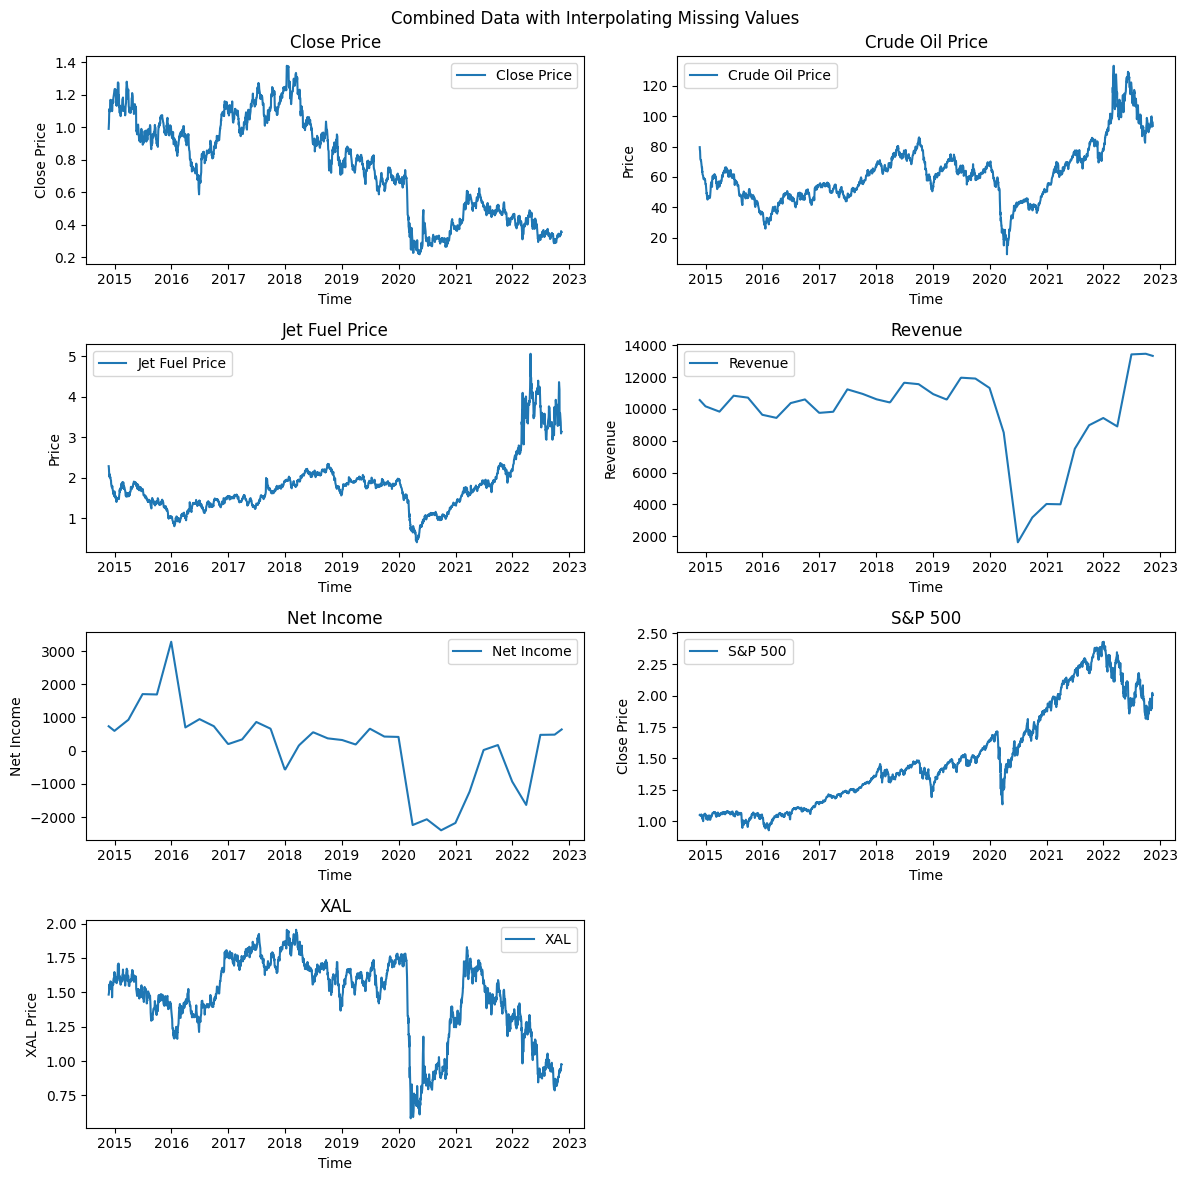

In [32]:
# drop rows with NaN in the column 'Close'
combined_df = combined_df.dropna(subset=['Close'])
# interpolate the remaining NaN values
combined_df = combined_df.interpolate()

plot_combined(combined_df, 'Combined Data with Interpolating Missing Values')

In [33]:
combined_df.columns

Index(['Date', 'Close', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue',
       'Net Income', 'S&P 500', 'XAL'],
      dtype='object')

### Confine Our Focus Before Covid-19

In [34]:
combined_df = combined_df[combined_df['Date'] <= '2020-01-01']
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to a specific column
combined_df['Crude Oil Price'] = scaler.fit_transform(combined_df[['Crude Oil Price']])
combined_df['Jet Fuel Price'] = scaler.fit_transform(combined_df[['Jet Fuel Price']])
combined_df['Revenue'] = scaler.fit_transform(combined_df[['Revenue']])
combined_df['Net Income'] = scaler.fit_transform(combined_df[['Net Income']])
combined_df['S&P 500'] = scaler.fit_transform(combined_df[['S&P 500']])
combined_df['XAL'] = scaler.fit_transform(combined_df[['XAL']])

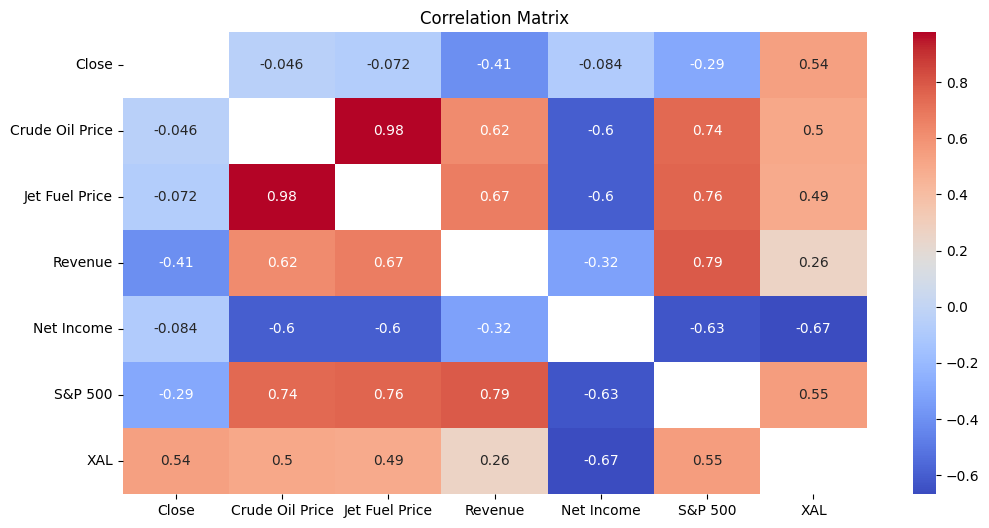

In [35]:
# calculate correlation matrix between all features
corr = combined_df[[ 'Close', 'Crude Oil Price', 'Jet Fuel Price', 'Revenue',
       'Net Income', 'S&P 500', 'XAL']].corr()
# delete the diagonal line
corr = corr.mask(np.eye(len(corr), dtype=bool))
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Divide to Train and Test

In [36]:
# split combined_df into train (75%), and test (25%) sets
train_size = int(0.75 * len(combined_df))
test_size = len(combined_df) - train_size 

# create a new column 'set' to indicate which set each row belongs to
combined_df['set'] = ['train'] * train_size + ['test'] * test_size
print(f'train size: {train_size}, test size: {test_size}')

train size: 963, test size: 321


In [42]:
combined_df.head(5)

,Date,Close,Crude Oil Price,Jet Fuel Price,Revenue,Net Income,S&P 500,XAL,set
0,2014-11-24,0.990157,0.892607,0.963011,0.443391,0.338313,0.170333,0.405661,train
1,2014-11-25,1.011697,0.859307,0.942245,0.439180,0.337336,0.168646,0.417473,train
2,2014-11-26,1.030487,0.855478,0.903310,0.434969,0.336358,0.172757,0.423893,train
4,2014-11-28,1.112064,0.763903,0.792992,0.426547,0.334403,0.169022,0.497936,train
7,2014-12-01,1.097170,0.746920,0.832576,0.413914,0.331471,0.159015,0.462012,train


In [38]:
# get date range for train and test sets
print(f'Train: ({combined_df[combined_df["set"] == "train"]["Date"].min()}, {combined_df[combined_df["set"] == "train"]["Date"].max()})')
print(f'Test: ({combined_df[combined_df["set"] == "test"]["Date"].min()}, {combined_df[combined_df["set"] == "test"]["Date"].max()})')

Train: (2014-11-24 00:00:00, 2018-09-20 00:00:00)
Test: (2018-09-21 00:00:00, 2019-12-31 00:00:00)


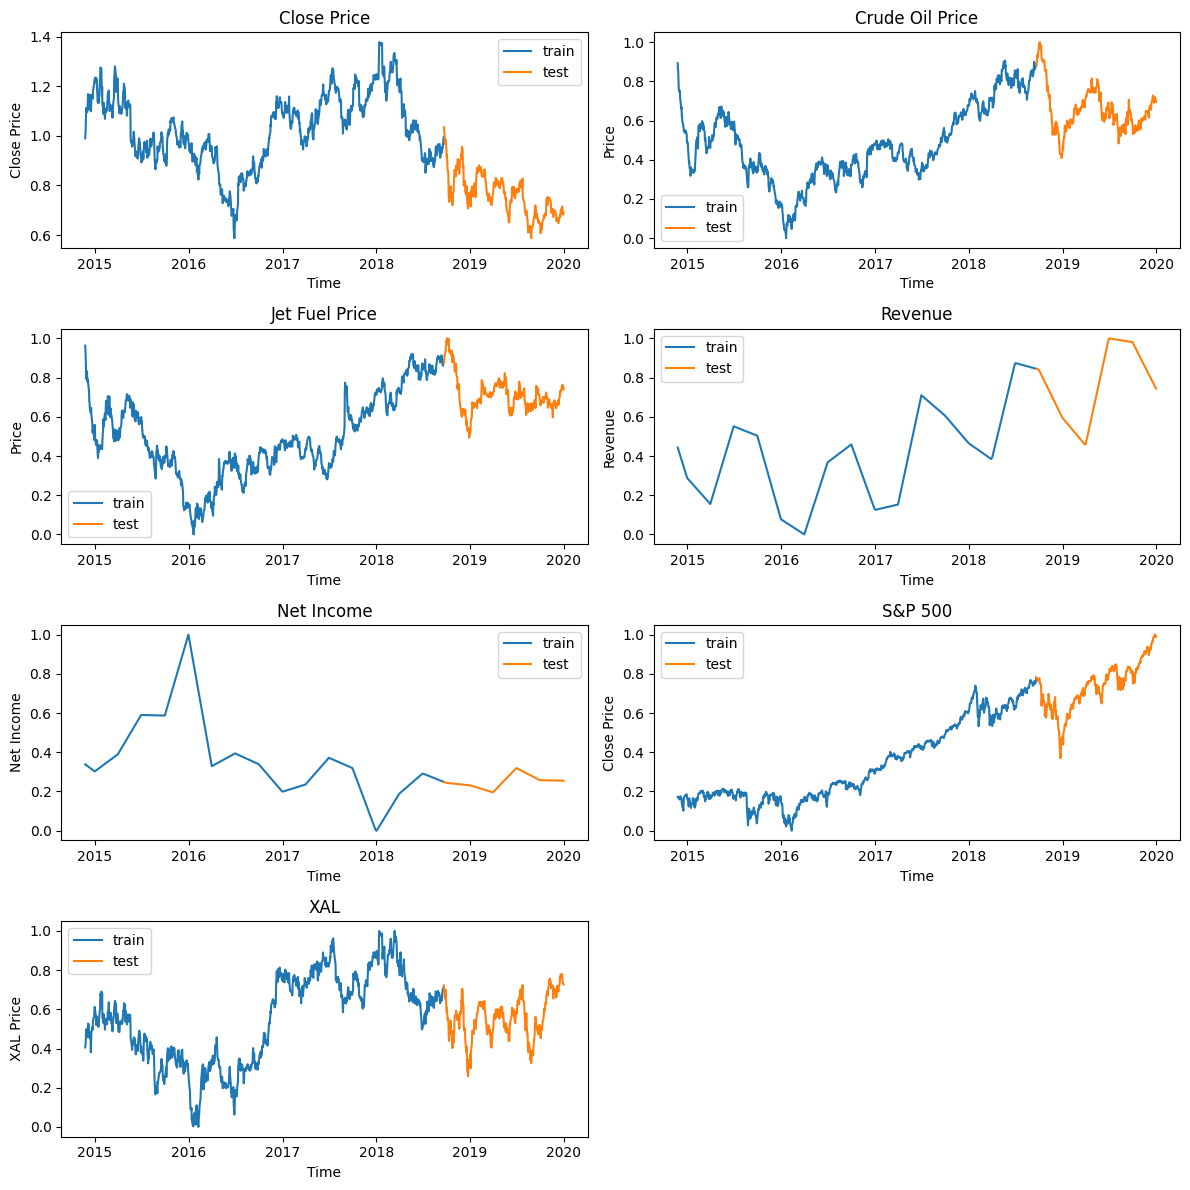

In [39]:
# Define the features to plot
features = [
    ('Close', 'Close Price', 'Close Price'),
    ('Crude Oil Price', 'Crude Oil Price', 'Price'),
    ('Jet Fuel Price', 'Jet Fuel Price', 'Price'),
    ('Revenue', 'Revenue', 'Revenue'),
    ('Net Income', 'Net Income', 'Net Income'),
    ('S&P 500', 'S&P 500', 'Close Price'),
    ('XAL', 'XAL', 'XAL Price')  # New feature
]

# Set up the figure size and layout
plt.figure(figsize=(12, 12))  # Adjusted for 7 subplots

# Plot each feature in a loop
for i, (col, title, ylabel) in enumerate(features, start=1):
    plt.subplot(4, 2, i)  # Adjust for 4x2 layout to accommodate 7 subplots
    plt.plot(combined_df[combined_df['set'] == 'train']['Date'], combined_df[combined_df['set'] == 'train'][col], label='train')
    plt.plot(combined_df[combined_df['set'] == 'test']['Date'], combined_df[combined_df['set'] == 'test'][col], label='test')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()

plt.tight_layout()  # Ensure no overlap
plt.show()

In [40]:
combined_df.to_csv('data_final/with_xal.csv', index=False)

## Check Median Market Week and Month

In [41]:
# check how many rows are in each week and month
new_df = combined_df.copy()

# Add Week, Month, and Year columns for grouping
new_df['Week'] = new_df['Date'].dt.isocalendar().week
new_df['Month'] = new_df['Date'].dt.month
new_df['Year'] = new_df['Date'].dt.year

# Calculate the number of market days in each week
weekly_counts = new_df.groupby(['Year', 'Week']).size()
median_weekly_days = weekly_counts.median()

# Calculate the number of market days in each month
monthly_counts = new_df.groupby(['Year', 'Month']).size()
median_monthly_days = monthly_counts.median()

# Display the results
print("Median number of market days in a week:", median_weekly_days)
print("Median number of market days in a month:", median_monthly_days)

Median number of market days in a week: 5.0
Median number of market days in a month: 21.0


Median Market Week: 5 days
Median Market Month: 21 days

Thus, we will predict with horizons $H$ = 1 (Day), 5 (Week) and 21 (Month).